<a href="https://colab.research.google.com/github/tainguyen30/AI-2022-2023/blob/main/Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


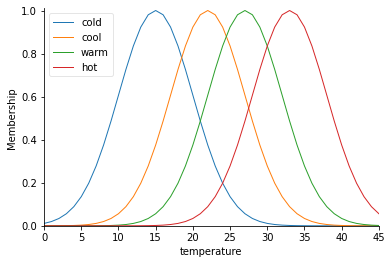

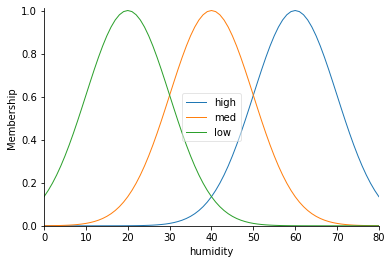

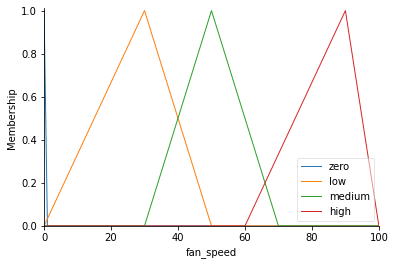

In [ ]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

temperature = ctrl.Antecedent(np.arange(0,46,1),'temperature')    
humidity = ctrl.Antecedent(np.arange(0,81,1),'humidity')
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan_speed')

temperature['cold']  = fuzz.gaussmf(temperature.universe,15,5)
temperature['cool']  = fuzz.gaussmf(temperature.universe,22,5)
temperature['warm'] = fuzz.gaussmf(temperature.universe,27,5)
temperature['hot'] = fuzz.gaussmf(temperature.universe,33,5)

humidity['high'] = fuzz.gaussmf(humidity.universe,60,10)
humidity['med'] = fuzz.gaussmf(humidity.universe,40,10)
humidity['low'] = fuzz.gaussmf(humidity.universe,20,10)

fan_speed['zero'] = fuzz.trimf(fan_speed.universe,[0,0,0])   
fan_speed['low'] = fuzz.trimf(fan_speed.universe,[0,30,50])   
fan_speed['medium'] = fuzz.trimf(fan_speed.universe,[30,50,70])         
fan_speed['high'] = fuzz.trimf(fan_speed.universe,[60,90,100])            
      
  
temperature.view()
humidity.view()
fan_speed.view()




32.89147862433961
20.295923611272027
30.225684348935886


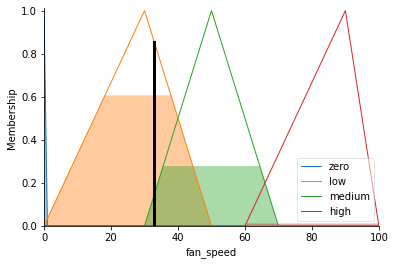

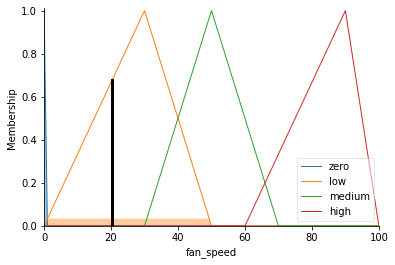

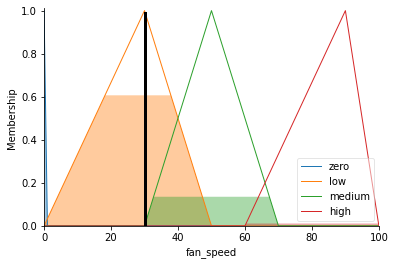

In [ ]:
rule0 = ctrl.Rule(temperature['cold']&humidity['high'],fan_speed['high'])
rule1 = ctrl.Rule(temperature['cool']&humidity['high'],fan_speed['medium'])
rule2 = ctrl.Rule(temperature['warm']&humidity['high'],fan_speed['low'])
rule3 = ctrl.Rule(temperature['hot']&humidity['high'],fan_speed['zero'])


rule4 = ctrl.Rule(temperature['cold']&humidity['med'],fan_speed['medium'])
rule5 = ctrl.Rule(temperature['cool']&humidity['med'],fan_speed['low'])
rule6 = ctrl.Rule(temperature['warm']&humidity['med'],fan_speed['zero'])
rule7 = ctrl.Rule(temperature['hot'] &humidity['med'],fan_speed['zero'])


rule8 = ctrl.Rule(temperature['cold']&humidity['low'],fan_speed['medium'])
rule9 = ctrl.Rule(temperature['cool']&humidity['low'],fan_speed['low'])
rule10 = ctrl.Rule(temperature['warm']&humidity['low'],fan_speed['zero'])
rule11 = ctrl.Rule(temperature['hot'] &humidity['low'],fan_speed['zero'])



fan_speedping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule0])
fan_speedping = ctrl.ControlSystemSimulation(fan_speedping_ctrl)
fan_speedping.input['humidity']=50
fan_speedping.input['temperature']=30
fan_speedping.compute()
print(fan_speedping.output['fan_speed'])
fan_speed.view(sim=fan_speedping)


fan_speedping.input['humidity']=10
fan_speedping.input['temperature']=35
fan_speedping.compute()
print(fan_speedping.output['fan_speed'])
fan_speed.view(sim=fan_speedping)

fan_speedping.input['humidity']=30
fan_speedping.input['temperature']=25
fan_speedping.compute()
print(fan_speedping.output['fan_speed'])
fan_speed.view(sim=fan_speedping)





<ipython-input-27-6d8977844a88>:20: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'z',offset =6,cmap = 'viridis',anpha=0.5)
<ipython-input-27-6d8977844a88>:21: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'x',offset =9,cmap = 'viridis',anpha=0.5)
<ipython-input-27-6d8977844a88>:22: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'y',offset =9,cmap = 'viridis',anpha=0.5)


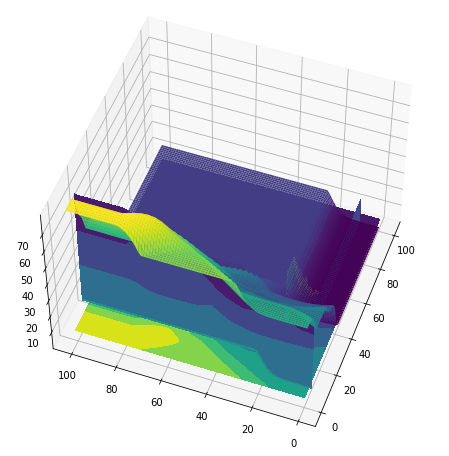

In [ ]:
system = ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule0])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 101*101+1)
upsampled = np.linspace(0,101,101)
x,y = np.meshgrid(upsampled,upsampled)
z=np.zeros_like(x)


for i in range(101):
    for j in range(101):
        sim.input['temperature'] = x[i,j]
        sim.input['humidity'] = y[i,j]
        sim.compute()
        z[i,j] = sim.output['fan_speed']

 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf=ax.plot_surface(x,y,z,rstride =1 ,cstride =1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x,y,z,zdir = 'z',offset =6,cmap = 'viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir = 'x',offset =9,cmap = 'viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir = 'y',offset =9,cmap = 'viridis',anpha=0.5)
ax.view_init(50,200)